In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import *
import math
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

# Features For Clustering:
* First, We will begin by identifying the features our platform will generate
* Then, we will move foward on forming the basis of our model on 3 clusters, based on relational assumptions between our featrues (these assumptions will definetly change over the development of the model, however provide a basis for us to learn how our algorithm would handle data from the platform)

#### Features will be based off of data collected from the website and are comprised of:
* Engagement (X-Axis): Whether a lecture was watched, whether or not the student upvotes other's questions, office hour participation, discussion attendance (bc discussions are much more important now)
* Knowledge relevance (Y-Axis): Were the questions asked by the student relevant to the class? Were they upvoted by other students? Were similar questions asked? 
* Comprehension (Z-Axis): Quiz scores 

# Data Generation Class:
#### Serves to generate data for:
    #### 1) Visualizing assumed student clusterings and interactions between cluster distributions before algorithm
    #### 2) Generate aggregate data for KMeans clustering on assumed distributions to check accuracy

In [10]:
class DataGeneration:
    
    
    def __init__(self, num_datapoints, num_weeks, num_clusters):
        
        self.num_datapoints = num_datapoints 
        self.num_weeks = num_weeks
        self.num_clusters = num_clusters

        
    def generate_x(self, dist_min, dist_max):
                x_data  = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)]
                
                return x_data 


    def generate_y(self, dist_min, dist_max):
        y_data = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)]   

        return y_data


    def generate_z(self, dist_min, dist_max):
        z_data = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)] 

        return z_data
    
    
    def generate_data(self, dist_vals):
        ### Generates X,Y,Z data for each cluster distribution ###
        ### Used to generate data to visualize assumptions BEFORE running through clustering algorithm ###
        student_data = []
        x = 0
               
        ### Iterate through week data ###
        for i in range(self.num_weeks):
            week_data = []
            
            ### Iterate through clusters in each week ##
            for x in range(self.num_clusters):
                if i != 0:
                    cluster_data = []
                    cluster_data.append(self.generate_x(dist_vals[x][0][0], dist_vals[x][0][1])) 
                    cluster_data.append(self.generate_y(dist_vals[x][1][0], dist_vals[x][1][1]))
                    cluster_data.append(self.generate_z(dist_vals[x][2][0], dist_vals[x][2][1])) 
                    
                    week_data.append(cluster_data)
                else:
                    cluster_data = []
                    cluster_data.append(self.generate_x(dist_vals[x][0][0], dist_vals[x][0][1]))
                    cluster_data.append(self.generate_y(dist_vals[x][1][0], dist_vals[x][1][1]))
                    cluster_data.append(self.generate_z(dist_vals[x][2][0], dist_vals[x][2][1])) 
                    week_data.append(cluster_data)
            student_data.append(week_data)


        return student_data


    def generate_data2(self, dist_vals):
        ### Generates aggregate X,Y,& Z data for clustering ### 
        student_data = []
        x_data = []
        y_data = []
        z_data = []
        
        x = 0
        gen_iter = 1

        for i in range(gen_iter):
            for x in range(3):
                x_data += self.generate_x(dist_vals[x][0][0], dist_vals[0][0][1])
                y_data += self.generate_y(dist_vals[x][1][0], dist_vals[1][1][1])
                z_data += self.generate_z(dist_vals[x][2][0], dist_vals[2][2][1]) 
        student_data.append(x_data)
        student_data.append(y_data)
        student_data.append(z_data)
           
        return student_data

In [11]:
class Visualize():
    
    
    def __init__(self, student_data):
        self.student_data = student_data   
    
    
    def visualize(self, week_num):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        colors = ["r", "g", "b"]
        i = 0

        for c in self.student_data[week_num-1]:
            ax.scatter(c[0], c[1], c[2],  color = colors[i], marker='o')

            i +=1
            
        ax.set_xlabel("Engagement")
        ax.set_ylabel("KnowledgeRelevance")
        ax.set_zlabel("Comprehension")
        plt.tight_layout()
        plt.show()
    

# K_cluster_test1 (Proccess): Cluster assumption
* 1) Generate distributions for each cluster: [ [ [x1_min,x1_max],[y1_min,y1_max],[z1_min,z1_max] ],..., [ [xn_min,xn_max],[yn_min,yn_max],[zn_min,zn_max] ] ]
    ** Distrubutions are assumptions about distribution of X,Y,Z learning styles among class
* 2) Visualize data for these distributions
* 3) After predicting results for Assumption Distributions, 
    * (a) generate TRAINING & TEST aggregate clustering data for X,Y,Z axis 
    * (b) Run TRAINING data through clustering agorithm (and visualize in future)
    * (c) Produce accuracy score against TEST data
* 4) Use results from clustering algorithm to make notes on student grouping assumptions

## (1) Student Grouping Assumption Disributions: Test1

### Group1: [ASSUMPTION]
    * Engagement(X-axis):
    * Knowledge Relevance(Y-axis):
    * Comprehension(Z-axis):
   ##### Group1: [RESULTS]     
    
### Group2: [ASSUMPTION]
    * Engagement(X-axis):
    * Knowledge Relevance(Y-axis):
    * Comprehension(Z-axis):
   ##### Group2: [RESULTS]     
    
### Group3: [ASSUMPTION]
    * Engagement(X-axis):
    * Knowledge Relevance(Y-axis):
    * Comprehension(Z-axis):
   ##### Group3: [RESULTS]         
    
### Group'n': [ASSUMPTION]
    * Engagement(X-axis):
    * Knowledge Relevance(Y-axis):
    * Comprehension(Z-axis):
   ##### Group'n': [RESULTS]     

## (2) Pre-Cluster: Generate & Visualize Assumption Distributions for 'n' weeks

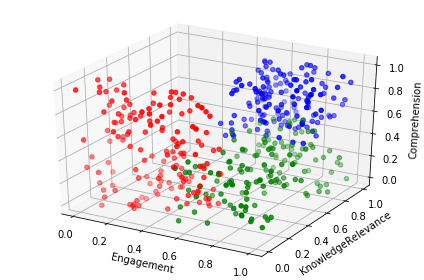

In [12]:
# dist_vals = [[[x1_min,x1_max][y1_min,y1_max][z1_min,z1_max]], [[x2_min,x2_max][y2_min,y2_max][z2_min,z2_max]],
#[[x3_min,x3_max][y3_min,y3_max][z3_min,z3_max]]]

dist_vals1 = [
    [[0,.7],[0,.3],[0,1]], 
    [[.5,1],[0,1],[0,.5]], 
    [[.5,1],[.5,1],[.5,1]]
]

student_data1 = DataGeneration(150,3,3).generate_data(dist_vals1)
vis1 = Visualize(student_data1).visualize(3)


## (3a) Generate TEST & TRAINING aggregate clustering data for X,Y,Z axis and run through clustering agorithm
##### Simulates clustering algorithm on 'n' weeks worth of data for 3 categories

In [13]:
cluster_demo = [
    [[0,.3],[0,.3],[.5,1]], 
    [[.5,1],[.2,.8],[0,.2]], 
    [[.8,1],[.5,1],[.5,1]]
]

student_data3 = DataGeneration(150,3,3).generate_data2(cluster_demo)
student_data3 = np.array(student_data3).T
df = pd.DataFrame(data=student_data3, columns = ["x_data", "y_data", "z_data"])
df


,x_data,y_data,z_data
0,0.147524,0.326810,0.535368
1,0.281448,0.005309,0.635448
2,0.120865,0.121336,0.623614
3,0.125806,0.367639,0.827538
4,0.135599,0.324279,0.857273
...,...,...,...
445,0.565214,0.528141,0.741666
446,0.507149,0.541401,0.599863
447,0.417073,0.745169,0.930685
448,0.325986,0.593339,0.636305


## (3b) Run TRAINING data through clustering agorithm 

In [14]:
y = DataGeneration(150,3,3).generate_data2(cluster_demo)
y = np.array(y).T

X = student_data3

kmeans = KMeans(n_clusters=2)
kmeans.fit(student_data3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## (3c) Use TEST  data to check clustering accuracy

In [15]:
## starter code for test-train accuracy test ###

# correct = 0
# for i in range(len(X)):
#     predict_me = np.array(X[i].astype(float))
#     predict_me = predict_me.reshape(-1, len(predict_me))
#     prediction = kmeans.predict(predict_me)
#     if prediction[0] == y[i]:
#         correct += 1

# print(correct/len(X))